In [1]:
import numpy as np 
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex
from scipy.misc import imread
from collections import Counter

%matplotlib inline
pd.set_option('display.max_columns', None)

# Sets para entrenar

## Datos del TP 1

In [2]:
postulantes_educacion_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv', encoding='utf-8')
postulantes_genero_edad_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv', encoding='utf-8')
vistas_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_3_vistas.csv', encoding='utf-8')
postulaciones_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_4_postulaciones.csv', encoding='utf-8')
avisos_online_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_5_avisos_online.csv', encoding='utf-8')
avisos_detalle_orig = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv', encoding='utf-8')

## Datos hasta 15 abril

In [3]:
postulantes_educacion_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_1_postulantes_educacion.csv', encoding='utf-8')
postulantes_genero_edad_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_2_postulantes_genero_y_edad.csv', encoding='utf-8')
vistas_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_3_vistas.csv', encoding='utf-8')
postulaciones_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_4_postulaciones.csv', encoding='utf-8')
avisos_online_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_5_avisos_online.csv', encoding='utf-8')
avisos_detalle_hasta_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_hasta_15_abril/entrega6/fiuba_6_avisos_detalle.csv', encoding='utf-8')

# Sets para testear

## Datos desde 15 abril

In [4]:
postulantes_educacion_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_1_postulantes_educacion.csv', encoding='utf-8')
postulantes_genero_edad_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_2_postulantes_genero_y_edad.csv', encoding='utf-8')
vistas_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_3_vistas.csv', encoding='utf-8')
avisos_detalle_desde_15_04 = pd.read_csv('../data/datos_navent_fiuba/fiuba_desde_15_abril/Fiuba desde 15 Abril/fiuba_6_avisos_detalle.csv', encoding='utf-8')

## 338 faltantes

In [5]:
# Estos registros solo aparecen en el set a predecir
avisos_detalle_338_faltantes = pd.read_csv('../data/datos_navent_fiuba/338_faltantes/fiuba_6_avisos_detalle_missing_nivel_laboral.csv', encoding='utf-8')

### Juntamos los 338 registros que faltan con el set a predecir

In [6]:
print(len(avisos_detalle_desde_15_04))

13798


In [7]:
avisos_detalle_desde_15_04 = pd.concat([avisos_detalle_desde_15_04, avisos_detalle_338_faltantes])

In [8]:
print(len(avisos_detalle_desde_15_04))

14136


## Unificamos los datos del TP 1 con los de hasta el 15 de abril

### postulantes_educacion

In [9]:
print('Longitud original: ', len(postulantes_educacion_orig))
print('Longitud nuevo set: ', len(postulantes_educacion_hasta_15_04))
postulantes_educacion = pd.concat([postulantes_educacion_orig, postulantes_educacion_hasta_15_04])
print('Longitud concat: ', len(postulantes_educacion))

# Eliminamos los duplicados. En este caso se considera duplicado si estas 3 columnas matchean
postulantes_educacion.drop_duplicates(['idpostulante', 'nombre', 'estado'], keep='last', inplace=True)
print('Longitud unique: ', len(postulantes_educacion))

Longitud original:  298231
Longitud nuevo set:  407453
Longitud concat:  705684
Longitud unique:  568612


In [10]:
postulantes_educacion.to_csv('../data/1_postulantes_educacion.csv', index=False, sep=',', encoding='utf-8')

### postulantes_genero_edad

In [11]:
print('Longitud original: ', len(postulantes_genero_edad_orig))
print('Longitud nuevo set: ', len(postulantes_genero_edad_hasta_15_04))
postulantes_genero_edad = pd.concat([postulantes_genero_edad_orig, postulantes_genero_edad_hasta_15_04])
print('Longitud concat: ', len(postulantes_genero_edad))

# Eliminamos los duplicados. En este caso se considera duplicado si el idpostulante matchea
postulantes_genero_edad.drop_duplicates(['idpostulante'], keep='last', inplace=True)
print('Longitud unique: ', len(postulantes_genero_edad))

Longitud original:  200888
Longitud nuevo set:  297747
Longitud concat:  498635
Longitud unique:  408146


In [12]:
postulantes_genero_edad.to_csv('../data/2_postulantes_genero_edad.csv', index=False, sep=',', encoding='utf-8')

### vistas

In [13]:
print('Longitud original: ', len(vistas_orig))
print('Longitud nuevo set: ', len(vistas_hasta_15_04))
vistas = pd.concat([vistas_orig, vistas_hasta_15_04])
print('Longitud concat: ', len(vistas))

# Eliminamos los duplicados. En este caso se considera duplicado si estas 3 columnas matchean
vistas.drop_duplicates(['idaviso', 'timestamp', 'idpostulante'], keep='last', inplace=True)
print('Longitud unique: ', len(vistas))

Longitud original:  961897
Longitud nuevo set:  5758686
Longitud concat:  6720583
Longitud unique:  6682591


In [14]:
vistas.to_csv('../data/3_vistas.csv', index=False, sep=',', encoding='utf-8')

### postulaciones

In [15]:
print('Longitud original: ', len(postulaciones_orig))
print('Longitud nuevo set: ', len(postulaciones_hasta_15_04))
postulaciones = pd.concat([postulaciones_orig, postulaciones_hasta_15_04])
print('Longitud concat: ', len(postulaciones))

# Eliminamos los duplicados. En este caso se considera duplicado si estas 3 columnas matchean
postulaciones.drop_duplicates(['idaviso', 'idpostulante', 'fechapostulacion'], keep='last', inplace=True)
print('Longitud unique: ', len(postulaciones))

Longitud original:  3401623
Longitud nuevo set:  4909641
Longitud concat:  8311264
Longitud unique:  6604534


In [16]:
postulaciones.to_csv('../data/4_postulaciones.csv', index=False, sep=',', encoding='utf-8')

### avisos_online

In [17]:
print('Longitud original: ', len(avisos_online_orig))
print('Longitud nuevo set: ', len(avisos_online_hasta_15_04))
avisos_online = pd.concat([avisos_online_orig, avisos_online_hasta_15_04])
print('Longitud concat: ', len(avisos_online))

# Eliminamos los duplicados. En este caso se considera duplicado si esta columna matchea
avisos_online.drop_duplicates(['idaviso'], keep='last', inplace=True)
print('Longitud unique: ', len(avisos_online))

Longitud original:  5028
Longitud nuevo set:  4858
Longitud concat:  9886
Longitud unique:  9430


In [18]:
avisos_online.to_csv('../data/5_avisos_online.csv', index=False, sep=',', encoding='utf-8')

### avisos_detalle

In [19]:
print('Longitud original: ', len(avisos_detalle_orig))
print('Longitud nuevo set: ', len(avisos_detalle_hasta_15_04))
avisos_detalle = pd.concat([avisos_detalle_orig, avisos_detalle_hasta_15_04])
print('Longitud concat: ', len(avisos_detalle))

# Eliminamos los duplicados. En este caso se considera duplicado si matchean estas columnas (por no matchear todas)
avisos_detalle.drop_duplicates(['idaviso', 'titulo', 'descripcion', 'nombre_zona', 'ciudad', 'tipo_de_trabajo', 'nivel_laboral'], keep='last', inplace=True)
print('Longitud unique: ', len(avisos_detalle))

Longitud original:  13534
Longitud nuevo set:  18299
Longitud concat:  31833
Longitud unique:  19632


In [20]:
avisos_detalle.to_csv('../data/6_avisos_detalle.csv', index=False, sep=',', encoding='utf-8')

## Postulantes unificados de todas las fechas

In [21]:
print(len(postulantes_educacion))
print(len(postulantes_genero_edad))

568612
408146


In [22]:
postulantes = pd.merge(postulantes_educacion, postulantes_genero_edad, on='idpostulante', how='outer')
postulantes_test = pd.merge(postulantes_educacion_desde_15_04, postulantes_genero_edad_desde_15_04, on='idpostulante', how='outer')

In [23]:
print(len(postulantes))

610363


In [24]:
postulantes.head(10)

,idpostulante,nombre,estado,fechanacimiento,sexo
0,8BkL,Universitario,En Curso,1976-07-21,FEM
1,8BkL,Universitario,Graduado,1976-07-21,FEM
2,8BkL,Posgrado,Graduado,1976-07-21,FEM
3,8BkL,Master,Graduado,1976-07-21,FEM
4,1d2B,Universitario,En Curso,1976-02-28,MASC
5,Ym2X,Otro,En Curso,1964-01-19,MASC
6,Ym2X,Universitario,Graduado,1964-01-19,MASC
7,6M3jr,Universitario,En Curso,1975-11-03,MASC
8,Z85B5,Universitario,En Curso,1976-04-27,FEM
9,Z85B5,Terciario/Técnico,Graduado,1976-04-27,FEM


In [25]:
print(len(postulantes))
print(len(postulantes_test))

610363
425206


In [26]:
postulantes.isnull().any()

idpostulante       False
nombre              True
estado              True
fechanacimiento     True
sexo               False
dtype: bool

In [27]:
postulantes_test.isnull().any()

idpostulante       False
nombre              True
estado              True
fechanacimiento     True
sexo               False
dtype: bool

In [28]:
postulantes_joined = pd.concat([postulantes, postulantes_test])

In [29]:
len(postulantes_joined)

1035569

In [31]:
postulantes_joined.drop_duplicates(subset = ['idpostulante', 'nombre', 'estado', 'fechanacimiento', 'sexo'], keep = 'last', inplace = True)

In [32]:
len(postulantes_joined)

751522

In [33]:
postulantes_joined.isnull().any()

idpostulante       False
nombre              True
estado              True
fechanacimiento     True
sexo               False
dtype: bool

In [34]:
postulantes_joined.to_csv('../data/postulantes_joined.csv', index=False, sep=',', encoding='utf-8')

## Avisos unificados de todas las fechas

In [35]:
print(len(avisos_detalle))
avisos_detalle.head(1)

19632


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste


In [36]:
print(len(avisos_detalle_desde_15_04))
avisos_detalle_desde_15_04.head(1)

14136


,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,1573840,1,VENDEDORA/O,Nuestra Búsqueda se orienta a la incorporación...,Capital Federal,Flores,NaN,Full-time,Otro,Ventas,RIBEIRO SUC. FLORES


In [37]:
avisos_detalle_joined = pd.concat([avisos_detalle, avisos_detalle_desde_15_04])

In [38]:
len(avisos_detalle_joined)

33768

In [39]:
avisos_detalle_joined.drop_duplicates(subset = ['idaviso', 'tituloa', 'descripcion', 'nombre_area'], keep = 'last',inplace = True)

In [40]:
len(avisos_detalle_joined)

25743

In [41]:
avisos_detalle_joined.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral            True
nombre_area             False
denominacion_empresa     True
dtype: bool

In [42]:
avisos_detalle_joined.head(3)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [43]:
avisos_detalle_joined.to_csv('../data/avisos_detalle_joined.csv', index=False, sep=',', encoding='utf-8')

# Limpieza/transformacion de datos

### Aplicamos las transformaciones tanto al set para entrenar como al que se va a usar para testear

In [44]:
postulantes_joined = pd.read_csv('../data/postulantes_joined.csv', sep=',', encoding='utf-8')
vistas_train = pd.read_csv('../data/3_vistas_train.csv', sep=',', encoding='utf-8')
postulaciones_train = pd.read_csv('../data/4_postulaciones_train.csv', sep=',', encoding='utf-8')
#avisos_online_train = pd.read_csv('../data/5_avisos_online_train.csv', sep=',', encoding='utf-8')
avisos_detalle_joined = pd.read_csv('../data/avisos_detalle_joined.csv', sep=',', encoding='utf-8')

#### Transfomaciones para postulantes

In [45]:
postulantes_joined.rename(columns={'nombre':'nombre_estudio','estado':'estado_estudio'}, inplace=True)

In [46]:
postulantes_joined.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo
0,8BkL,Universitario,En Curso,1976-07-21,FEM


In [47]:
len(postulantes_joined)

751522

In [48]:
print('Existen datos de', postulantes_joined['idpostulante'].value_counts().size, 'postulantes distintos')

Existen datos de 504407 postulantes distintos


In [49]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio      True
estado_estudio      True
fechanacimiento     True
sexo               False
dtype: bool

In [50]:
most_freq_nombre_estudio = postulantes_joined.nombre_estudio.mode()[0]
postulantes_joined.nombre_estudio.fillna(most_freq_nombre_estudio,inplace=True)
postulantes_joined.nombre_estudio.isnull().any()

False

In [51]:
most_freq_estado_estudio = postulantes_joined.estado_estudio.mode()[0]
postulantes_joined.estado_estudio.fillna(most_freq_estado_estudio,inplace=True)
postulantes_joined.estado_estudio.isnull().any()

False

In [52]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento     True
sexo               False
dtype: bool

In [53]:
def cuantificar_estudios(row):
    if (row['nombre_estudio'] == 'Doctorado'):
        row['nombre_estudio'] = 7
    if (row['nombre_estudio'] == 'Master'):    
        row['nombre_estudio'] = 6
    if (row['nombre_estudio'] == 'Posgrado'):    
        row['nombre_estudio'] = 5
    if (row['nombre_estudio'] == 'Universitario'):    
        row['nombre_estudio'] = 4
    if (row['nombre_estudio'] == 'Terciario/Técnico'):    
        row['nombre_estudio'] = 3
    if (row['nombre_estudio'] == 'Secundario'):    
        row['nombre_estudio'] = 2
    if (row['nombre_estudio'] == 'Otro'):    
        row['nombre_estudio'] = 1    
        
    if (row['estado_estudio'] == 'Graduado'):
        row['estado_estudio'] = 3
    if (row['estado_estudio'] == 'En Curso'):    
        row['estado_estudio'] = 2
    if (row['estado_estudio'] == 'Abandonado'):    
        row['estado_estudio'] = 1
        
    return row    

def descuantificar_estudios(row):
    if (row['nombre_estudio'] == 7):
        row['nombre_estudio'] = 'Doctorado'
    if (row['nombre_estudio'] == 6):    
        row['nombre_estudio'] = 'Master'
    if (row['nombre_estudio'] == 5):    
        row['nombre_estudio'] = 'Posgrado'
    if (row['nombre_estudio'] == 4):    
        row['nombre_estudio'] = 'Universitario'
    if (row['nombre_estudio'] == 3):    
        row['nombre_estudio'] = 'Terciario/Tecnico'
    if (row['nombre_estudio'] == 2):    
        row['nombre_estudio'] = 'Secundario'
    if (row['nombre_estudio'] == 1):    
        row['nombre_estudio'] = 'Otro'    
        
    if (row['estado_estudio'] == 3):
        row['estado_estudio'] = 'Graduado'
    if (row['estado_estudio'] == 2):    
        row['estado_estudio'] = 'EnCurso'
    if (row['estado_estudio'] == 1):    
        row['estado_estudio'] = 'Abandonado'
        
    return row    

In [54]:
postulantes_joined = postulantes_joined.apply(lambda row: cuantificar_estudios(row), axis=1)

In [55]:
# Obtenemos max de la columna nombre
idx = postulantes_joined.groupby(['idpostulante'])['nombre_estudio'].transform(max) == postulantes_joined['nombre_estudio']

In [56]:
# Sobre los anteriores, obtenemos los max de la columna estado
idx_postulantes_educacion_max = postulantes_joined[idx].groupby(['idpostulante'])['estado_estudio'].transform(max) == postulantes_joined[idx]['estado_estudio']

In [57]:
postulantes_joined = postulantes_joined[idx][idx_postulantes_educacion_max]

In [58]:
print(len(postulantes_joined))

504894


In [59]:
# Para volver a strings: 
postulantes_joined = postulantes_joined.apply(lambda row: descuantificar_estudios(row), axis=1)

In [60]:
postulantes_joined.head(2)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo
1,1d2B,Universitario,EnCurso,1976-02-28,MASC
2,6M3jr,Universitario,EnCurso,1975-11-03,MASC


In [61]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento     True
sexo               False
dtype: bool

In [62]:
most_freq_fechanacimiento = postulantes_joined.fechanacimiento.mode()[0]
postulantes_joined.fechanacimiento.fillna(most_freq_fechanacimiento,inplace=True)
postulantes_joined.fechanacimiento.isnull().any()

False

In [63]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
dtype: bool

In [64]:
# Convierto columnas con fechas a datetime
postulantes_joined['fechanacimiento'] = pd.to_datetime(postulantes_joined.fechanacimiento, format='%Y/%m/%d', errors='coerce')

In [65]:
most_freq_fechanacimiento = postulantes_joined.fechanacimiento.mode()[0]
postulantes_joined.fechanacimiento.fillna(most_freq_fechanacimiento,inplace=True)
postulantes_joined.fechanacimiento.isnull().any()

False

In [66]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
dtype: bool

In [67]:
# Agrego columna edad
anio_actual = pd.to_datetime('today').year
postulantes_joined['edad'] = postulantes_joined.fechanacimiento.map(lambda fecha: anio_actual - fecha.year).astype(int)

In [68]:
postulantes_joined.edad.isnull().any()

False

In [69]:
len(postulantes_joined)

504894

In [70]:
postulantes_joined.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
1,1d2B,Universitario,EnCurso,1976-02-28,MASC,42


In [71]:
postulantes_joined['edad'] = postulantes_joined['edad'].astype(int)

In [72]:
postulantes_joined.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
1,1d2B,Universitario,EnCurso,1976-02-28,MASC,42


In [73]:
postulantes_joined.dtypes

idpostulante               object
nombre_estudio             object
estado_estudio             object
fechanacimiento    datetime64[ns]
sexo                       object
edad                        int64
dtype: object

In [74]:
postulantes_joined.isnull().any()

idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

#### Transfomaciones para avisos

In [75]:
print(len(avisos_detalle_joined))
print('Existen avisos nulos:', avisos_detalle_joined.idaviso.isnull().any())
#avisos_detalle_joined = avisos_detalle_joined.dropna(subset=['idaviso'], how='all')
#print(len(avisos_detalle_joined))

25743
Existen avisos nulos: False


In [76]:
avisos_detalle_joined.drop(columns=['idpais','ciudad','mapacalle', 'nombre_zona'], inplace=True)

In [77]:
avisos_detalle_joined.head(1)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,17903700,Enfermeras,<p>Solicitamos para importante cadena de farma...,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste


In [78]:
print(avisos_detalle_joined.tipo_de_trabajo.isnull().any())
print(avisos_detalle_joined.nivel_laboral.isnull().any())
print(avisos_detalle_joined.nombre_area.isnull().any())
print(avisos_detalle_joined.descripcion.isnull().any())

False
True
False
False


In [79]:
print('Existen',avisos_detalle_joined.nivel_laboral.isnull().sum(), 'avisos que no especifican nivel laboral')

Existen 335 avisos que no especifican nivel laboral


In [80]:
most_freq_nivel_laboral = avisos_detalle_joined.nivel_laboral.mode()[0]
most_freq_nivel_laboral

'Senior / Semi-Senior'

In [81]:
avisos_detalle_joined.nivel_laboral.fillna(most_freq_nivel_laboral,inplace=True)
avisos_detalle_joined.nivel_laboral.replace(to_replace='None',value=most_freq_nivel_laboral,inplace=True)
avisos_detalle_joined.nivel_laboral.replace(to_replace='NaN',value=most_freq_nivel_laboral,inplace=True)
avisos_detalle_joined.nivel_laboral.replace(to_replace='nil',value=most_freq_nivel_laboral,inplace=True)

In [82]:
print('Existen',avisos_detalle_joined.nivel_laboral.isnull().sum(), 'avisos que no especifican nivel laboral')

Existen 0 avisos que no especifican nivel laboral


In [83]:
avisos_detalle_joined.head(1)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,17903700,Enfermeras,<p>Solicitamos para importante cadena de farma...,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste


In [84]:
def clean_html(row):
    clean_html_regex = re.compile('<.*?>')
    row['descripcion'] = re.sub(clean_html_regex, '', row['descripcion'])
    return row

avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: clean_html(row), axis=1)

In [85]:
avisos_detalle_joined.head(1)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,17903700,Enfermeras,Solicitamos para importante cadena de farmacia...,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste


In [86]:
avisos_detalle_joined['descripcion'].head(5)

0    Solicitamos para importante cadena de farmacia...
1    TE GUSTA MANEJAR? QUERES GANAR PLATA HACIENDO ...
2    OPERARIOS DE PLANTANos encontramos en la búsqu...
3    Agente\r\noficial Selecciona:\r\n \r\nNuestra ...
4    Centro Médico Accord se encuentra en la búsque...
Name: descripcion, dtype: object

**Clustering para descripcion**

In [87]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, HashingVectorizer
from stop_words import get_stop_words

stop_words = get_stop_words('es')

# Elegir uno HashingTrick/TF-IDF_Vectorizer
# n_features para elegir la cantidad de cols
hash_vectorizer = make_pipeline(HashingVectorizer(), TfidfTransformer())
X = hash_vectorizer.fit_transform(avisos_detalle_joined.descripcion.values)
#tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
#X = tfidf_vectorizer.fit_transform(avisos.descripcion.values)
#print(tfidf_vectorizer.vocabulary_)
#print(tfidf_vectorizer.idf_)
print(X.shape)
X

(25743, 1048576)
CPU times: user 3.11 s, sys: 20 ms, total: 3.13 s
Wall time: 3.18 s


k: 2 | cost: 22462.31644621542
k: 3 | cost: 22196.028840985593
k: 4 | cost: 21917.273546383403
k: 5 | cost: 21681.30237458788
k: 6 | cost: 21702.477542842633
k: 7 | cost: 21622.313935501785
k: 8 | cost: 21526.21756558584
k: 9 | cost: 21485.495933610124
k: 10 | cost: 21421.01013747206
k: 11 | cost: 21392.021092833795
k: 12 | cost: 21361.63890787337
k: 13 | cost: 21377.881133640534
k: 14 | cost: 21314.721449458542
k: 15 | cost: 21230.022581906665
k: 16 | cost: 21257.05892361006
k: 17 | cost: 21217.947943904495
k: 18 | cost: 21184.72839652906
k: 19 | cost: 21226.329489648673
k: 20 | cost: 21153.065575926426


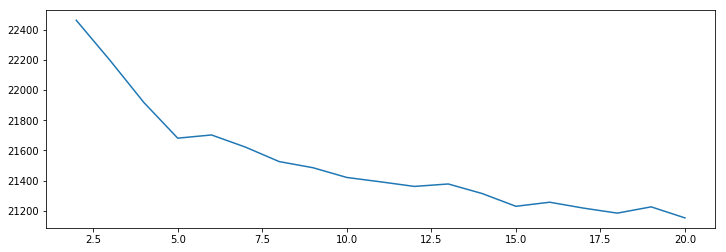

CPU times: user 4min 48s, sys: 5.78 s, total: 4min 53s
Wall time: 2min 54s


In [88]:
%%time
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans

#hc = AgglomerativeClustering()
#hc
clusters = []
costs = []
for n_clusters in range(2,21):
  #model = KMeans(n_clusters=n_clusters, n_jobs=-2)
  model = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000)
  model.fit(X)
  clusters.append(n_clusters)
  costs.append(model.inertia_)
  print('k:',n_clusters,'| cost:', model.inertia_)
plt.figure(figsize=(12,4))
plt.plot(clusters,costs)
plt.show()

In [89]:
%%time
mbkm_model = MiniBatchKMeans(n_clusters=7, batch_size=10000)
mbkm_model.fit(X)

CPU times: user 17 s, sys: 380 ms, total: 17.4 s
Wall time: 9.36 s


In [90]:
pd.get_dummies(mbkm_model.labels_).rename(columns=(dict([(n,f'desc_{n+1}') for n in range(7)]))).head(4)

,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0


In [91]:
descripciones = pd.get_dummies(mbkm_model.labels_).rename(columns=(dict([(n,f'desc_{n+1}') for n in range(7)])))
avisos_detalle_joined = pd.concat([avisos_detalle_joined, descripciones], axis=1)

In [92]:
avisos_detalle_joined.head(1)

,idaviso,titulo,descripcion,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7
0,17903700,Enfermeras,Solicitamos para importante cadena de farmacia...,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,0,0,0,1,0,0,0


In [93]:
avisos_detalle_joined.drop(columns=['descripcion'], inplace=True)

In [94]:
avisos_detalle_joined.drop(columns=['titulo'], inplace=True)

In [95]:
print(len(avisos_detalle_joined))

25743


In [96]:
avisos_detalle_joined.drop(['denominacion_empresa'], axis=1, inplace=True)

In [97]:
def remove_whitespaces(row, col):
    row[col] = "".join(row[col].split())
    return row

In [98]:
# Eliminamos los espacios en blanco para evitar problemas con el nombre de las columnas
avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: remove_whitespaces(row, 'nivel_laboral'), axis=1)
avisos_detalle_joined = avisos_detalle_joined.apply(lambda row: remove_whitespaces(row, 'nombre_area'), axis=1)

In [99]:
print(len(avisos_detalle_joined))

25743


In [100]:
avisos_detalle_joined.drop_duplicates(subset='idaviso', keep="last", inplace=True)

In [101]:
print(len(avisos_detalle_joined))

25288


In [102]:
avisos_detalle_joined.dtypes

idaviso             int64
tipo_de_trabajo    object
nivel_laboral      object
nombre_area        object
desc_1              int64
desc_2              int64
desc_3              int64
desc_4              int64
desc_5              int64
desc_6              int64
desc_7              int64
dtype: object

#### Transformaciones para las postulaciones

In [103]:
postulaciones_train.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [104]:
postulaciones_train.drop(columns=['fechapostulacion'], inplace=True)

In [105]:
# Contamos la cantidad de postulaciones para cada aviso y lo agregamos a una nueva columna
cant_postulaciones_por_aviso = postulaciones_train.groupby('idaviso').agg({'idpostulante':'count'})
cant_postulaciones_por_aviso.reset_index(inplace=True)
cant_postulaciones_por_aviso.rename(columns = {'idpostulante':'cant_postulaciones_aviso'}, inplace = True)

In [106]:
cant_postulaciones_por_aviso.head(3)

,idaviso,cant_postulaciones_aviso
0,8725750,137
1,11740890,13
2,12543760,1080


In [ ]:
cant_postulaciones_por_aviso.dtypes

idaviso                     int64
cant_postulaciones_aviso    int64
dtype: object

#### Transformaciones para las vistas

In [ ]:
vistas_train.rename(columns={'idAviso':'idaviso','timestamp':'fechavista'}, inplace=True)
vistas_desde_15_04.rename(columns={'idAviso':'idaviso','timestamp':'fechavista'}, inplace=True)

In [ ]:
vistas_joined = pd.concat([vistas_train, vistas_desde_15_04])

In [ ]:
print(len(vistas_joined))
vistas_joined.drop_duplicates(subset=['idaviso', 'fechavista', 'idpostulante'])
print(len(vistas_joined))

In [ ]:
vistas_joined.drop(columns=['fechavista'], inplace=True)

In [ ]:
vistas_joined.head(1)

In [ ]:
# Contamos la cantidad de postulaciones para cada aviso y lo agregamos a una nueva columna
cant_vistas_por_aviso = vistas_joined.groupby('idaviso').agg({'idpostulante':'count'})
cant_vistas_por_aviso.reset_index(inplace=True)
cant_vistas_por_aviso.rename(columns = {'idpostulante':'cant_vistas_aviso'}, inplace = True)
cant_vistas_por_aviso.head(5)

In [ ]:
cant_vistas_por_aviso.dtypes

In [ ]:
avisos_detalle_joined.head(1)

In [ ]:
avisos_detalle_joined = pd.merge(avisos_detalle_joined, cant_vistas_por_aviso, how='left', on=['idaviso'])

In [ ]:
avisos_detalle_joined['cant_vistas_aviso'].fillna(0,inplace = True)
avisos_detalle_joined['cant_vistas_aviso'] = avisos_detalle_joined['cant_vistas_aviso'].astype(int)

In [ ]:
avisos_detalle_joined.head(15)

In [ ]:
avisos_detalle_joined.cant_vistas_aviso.isnull().sum()

In [ ]:
avisos_detalle_joined = pd.merge(avisos_detalle_joined, cant_postulaciones_por_aviso, how='left', on=['idaviso'])

In [ ]:
avisos_detalle_joined.head(1)

In [ ]:
avisos_detalle_joined['cant_postulaciones_aviso'].fillna(0,inplace = True)
avisos_detalle_joined['cant_postulaciones_aviso'] = avisos_detalle_joined['cant_postulaciones_aviso'].astype(int)

In [ ]:
avisos_detalle_joined.cant_postulaciones_aviso.isnull().sum()

In [ ]:
avisos_detalle_joined.sample(5)

In [ ]:
postulantes_joined.to_csv('../data/postulantes_joined.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
avisos_detalle_joined.to_csv('../data/avisos_detalle_joined.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
vistas_joined.to_csv('../data/vistas_joined.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
%who

# Checkpoint 1

# Juntamos todo en un solo DF

In [2]:
avisos_detalle_joined = pd.read_csv('../data/avisos_detalle_joined.csv', encoding='utf-8')
postulantes_joined = pd.read_csv('../data/postulantes_joined.csv', encoding='utf-8')
postulaciones = pd.read_csv('../data/4_postulaciones_train.csv', encoding='utf-8')
vistas_joined = pd.read_csv('../data/vistas_joined.csv', sep=',', encoding='utf-8')

In [3]:
vistas_test = pd.read_csv('../data/3_vistas_test.csv', encoding='utf-8')

## Set a predecir

In [4]:
data_predecir = pd.read_csv('../data/test_final_100k.csv', encoding='utf-8')

In [5]:
print('Existen ids repetidos en el set a predecir:',data_predecir.duplicated('id').any())

Existen ids repetidos en el set a predecir: False


In [6]:
postulantes_conocidos = postulantes_joined.merge(data_predecir, on=['idpostulante'], how='inner')
print('Existen datos de',len(data_predecir) - len(postulantes_conocidos), 'postulantes para los que no tenemos datos')

Existen datos de -120 postulantes para los que no tenemos datos


### Genero un set de 'no_postulados' con una muestra random para crear casos en que postulantes no aplican a a visos

In [7]:
postulantes_sample = postulantes_joined.sample(10000)
for i in range(1,650):
    postulantes_sample = pd.concat([postulantes_sample, postulantes_joined.sample(10000)])

In [8]:
print(len(postulantes_sample))

6500000


In [9]:
postulantes_sample.reset_index(inplace=True)
postulantes_sample.drop(columns = 'index', inplace = True)
postulantes_sample.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1LMrxb,Universitario,EnCurso,1983-07-31,FEM,35


In [10]:
avisos_sample = avisos_detalle_joined.sample(10000)
for i in range(1,650):
    avisos_sample = pd.concat([avisos_sample, avisos_detalle_joined.sample(10000)])

In [11]:
print(len(avisos_sample))

6500000


In [12]:
avisos_sample.reset_index(inplace=True)
avisos_sample.drop(columns = 'index', inplace = True)
avisos_sample.head(1)

,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso
0,1112437339,Full-time,Senior/Semi-Senior,Comercial,0,0,0,0,0,1,0,392,90


In [13]:
no_postulados = postulantes_sample.join(avisos_sample)

In [14]:
print(len(no_postulados))
no_postulados.head(1)

6500000


,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso
0,1LMrxb,Universitario,EnCurso,1983-07-31,FEM,35,1112437339,Full-time,Senior/Semi-Senior,Comercial,0,0,0,0,0,1,0,392,90


In [15]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

### Joineo al de entrenamiento con postulaciones (vistas por el momento no) y al de test con el pedido

In [16]:
print(len(postulaciones))

6604534


In [17]:
postulaciones.head(1)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34


In [18]:
postulaciones_postulantes = pd.merge(postulaciones, postulantes_joined, on='idpostulante', how='left')

In [19]:
postulaciones_postulantes_test = pd.merge(data_predecir, postulantes_joined, on='idpostulante', how='left')

In [20]:
postulaciones_postulantes_test.duplicated('id').any()

True

In [21]:
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48


In [22]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,0,739260,6M9ZQR,Doctorado,Graduado,1976-03-29,FEM,42


In [23]:
print(len(postulaciones_postulantes))

6613736


In [24]:
postulaciones_postulantes.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
nombre_estudio      False
estado_estudio      False
fechanacimiento     False
sexo                False
edad                False
dtype: bool

In [25]:
postulaciones_postulantes_test.isnull().any()

id                 False
idaviso            False
idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [26]:
most_freq_nombre_estudio = postulaciones_postulantes_test.nombre_estudio.mode()[0]
postulaciones_postulantes_test.nombre_estudio.fillna(most_freq_nombre_estudio,inplace=True)
postulaciones_postulantes_test.nombre_estudio.isnull().any()

False

In [27]:
most_freq_estado_estudio = postulaciones_postulantes_test.estado_estudio.mode()[0]
postulaciones_postulantes_test.estado_estudio.fillna(most_freq_estado_estudio,inplace=True)
postulaciones_postulantes_test.estado_estudio.isnull().any()

False

In [28]:
most_freq_fechanacimiento = postulaciones_postulantes_test.fechanacimiento.mode()[0]
postulaciones_postulantes_test.fechanacimiento.fillna(most_freq_fechanacimiento,inplace=True)
postulaciones_postulantes_test.fechanacimiento.isnull().any()

False

In [29]:
most_freq_sexo = postulaciones_postulantes_test.sexo.mode()[0]
postulaciones_postulantes_test.sexo.fillna(most_freq_sexo,inplace=True)
postulaciones_postulantes_test.sexo.isnull().any()

False

In [30]:
most_freq_edad = postulaciones_postulantes_test.edad.mode()[0]
postulaciones_postulantes_test.edad.fillna(most_freq_edad,inplace=True)
postulaciones_postulantes_test.edad.isnull().any()

False

In [31]:
no_postulados.isnull().any()

idpostulante                False
nombre_estudio              False
estado_estudio              False
fechanacimiento             False
sexo                        False
edad                        False
idaviso                     False
tipo_de_trabajo             False
nivel_laboral               False
nombre_area                 False
desc_1                      False
desc_2                      False
desc_3                      False
desc_4                      False
desc_5                      False
desc_6                      False
desc_7                      False
cant_vistas_aviso           False
cant_postulaciones_aviso    False
dtype: bool

In [32]:
postulaciones_postulantes_test.isnull().any()

id                 False
idaviso            False
idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

In [33]:
postulaciones_postulantes_test.isnull().any()

id                 False
idaviso            False
idpostulante       False
nombre_estudio     False
estado_estudio     False
fechanacimiento    False
sexo               False
edad               False
dtype: bool

#### One hot encoding de columnas categoricas

In [34]:
postulaciones_postulantes['nombre_estudio'] = postulaciones_postulantes['nombre_estudio'].astype(str)
postulaciones_postulantes['estado_estudio'] = postulaciones_postulantes['estado_estudio'].astype(str)
postulaciones_postulantes_test['nombre_estudio'] = postulaciones_postulantes_test['nombre_estudio'].astype(str)
postulaciones_postulantes_test['estado_estudio'] = postulaciones_postulantes_test['estado_estudio'].astype(str)

In [35]:
no_postulados['nombre_estudio'] = no_postulados['nombre_estudio'].astype(str)
no_postulados['estado_estudio'] = no_postulados['estado_estudio'].astype(str)

In [36]:
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48


In [37]:
nombres_estudio = postulaciones_postulantes.nombre_estudio.str.get_dummies()
nombres_estudio.columns = ['nombre_estudio_' + col for col in nombres_estudio.columns]
postulaciones_postulantes = pd.concat([postulaciones_postulantes, nombres_estudio], axis=1)

In [38]:
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48,0,0,0,0,1,0,0


In [39]:
nombres_estudio = postulaciones_postulantes_test.nombre_estudio.str.get_dummies()
nombres_estudio.columns = ['nombre_estudio_' + col for col in nombres_estudio.columns]
postulaciones_postulantes_test = pd.concat([postulaciones_postulantes_test, nombres_estudio], axis=1)

In [40]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario
0,0,739260,6M9ZQR,Doctorado,Graduado,1976-03-29,FEM,42,1,0,0,0,0,0,0


In [41]:
nombres_estudio = no_postulados.nombre_estudio.str.get_dummies()
nombres_estudio.columns = ['nombre_estudio_' + col for col in nombres_estudio.columns]
no_postulados = pd.concat([no_postulados, nombres_estudio], axis=1)

In [42]:
postulaciones_postulantes.columns

Index(['idaviso', 'idpostulante', 'fechapostulacion', 'nombre_estudio',
       'estado_estudio', 'fechanacimiento', 'sexo', 'edad',
       'nombre_estudio_Doctorado', 'nombre_estudio_Master',
       'nombre_estudio_Otro', 'nombre_estudio_Posgrado',
       'nombre_estudio_Secundario', 'nombre_estudio_Terciario/Tecnico',
       'nombre_estudio_Universitario'],
      dtype='object')

In [43]:
postulaciones_postulantes_test.columns

Index(['id', 'idaviso', 'idpostulante', 'nombre_estudio', 'estado_estudio',
       'fechanacimiento', 'sexo', 'edad', 'nombre_estudio_Doctorado',
       'nombre_estudio_Master', 'nombre_estudio_Otro',
       'nombre_estudio_Posgrado', 'nombre_estudio_Secundario',
       'nombre_estudio_Terciario/Tecnico', 'nombre_estudio_Universitario'],
      dtype='object')

In [44]:
no_postulados.columns

Index(['idpostulante', 'nombre_estudio', 'estado_estudio', 'fechanacimiento',
       'sexo', 'edad', 'idaviso', 'tipo_de_trabajo', 'nivel_laboral',
       'nombre_area', 'desc_1', 'desc_2', 'desc_3', 'desc_4', 'desc_5',
       'desc_6', 'desc_7', 'cant_vistas_aviso', 'cant_postulaciones_aviso',
       'nombre_estudio_Doctorado', 'nombre_estudio_Master',
       'nombre_estudio_Otro', 'nombre_estudio_Posgrado',
       'nombre_estudio_Secundario', 'nombre_estudio_Terciario/Tecnico',
       'nombre_estudio_Universitario'],
      dtype='object')

In [45]:
estados_estudio = postulaciones_postulantes.estado_estudio.str.get_dummies()
estados_estudio.columns = ['estado_estudio_' + col for col in estados_estudio.columns]
postulaciones_postulantes = pd.concat([postulaciones_postulantes, estados_estudio], axis=1)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,1112257047,NM5M,2018-01-15 16:22:34,Secundario,Graduado,1970-12-03,FEM,48,0,0,0,0,1,0,0,0,0,1


In [46]:
estados_estudio = postulaciones_postulantes_test.estado_estudio.str.get_dummies()
estados_estudio.columns = ['estado_estudio_' + col for col in estados_estudio.columns]
postulaciones_postulantes_test = pd.concat([postulaciones_postulantes_test, estados_estudio], axis=1)
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,0,739260,6M9ZQR,Doctorado,Graduado,1976-03-29,FEM,42,1,0,0,0,0,0,0,0,0,1


In [47]:
estados_estudio = no_postulados.estado_estudio.str.get_dummies()
estados_estudio.columns = ['estado_estudio_' + col for col in estados_estudio.columns]
no_postulados = pd.concat([no_postulados, estados_estudio], axis=1)
no_postulados.head(1)

,idpostulante,nombre_estudio,estado_estudio,fechanacimiento,sexo,edad,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,1LMrxb,Universitario,EnCurso,1983-07-31,FEM,35,1112437339,Full-time,Senior/Semi-Senior,Comercial,0,0,0,0,0,1,0,392,90,0,0,0,0,0,0,1,0,1,0


In [48]:
postulaciones_postulantes.drop(columns=['nombre_estudio', 'estado_estudio'], inplace=True)
postulaciones_postulantes_test.drop(columns=['nombre_estudio', 'estado_estudio'], inplace=True)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,fechapostulacion,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,1112257047,NM5M,2018-01-15 16:22:34,1970-12-03,FEM,48,0,0,0,0,1,0,0,0,0,1


In [49]:
no_postulados.drop(columns=['nombre_estudio', 'estado_estudio'], inplace=True)

In [50]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,fechanacimiento,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado
0,0,739260,6M9ZQR,1976-03-29,FEM,42,1,0,0,0,0,0,0,0,0,1


In [51]:
postulaciones_postulantes.drop(columns=['fechapostulacion', 'fechanacimiento'], inplace=True)
postulaciones_postulantes_test.drop(columns=['fechanacimiento'], inplace=True)

In [52]:
no_postulados.drop(columns=['fechanacimiento'], inplace=True)

In [53]:
postulaciones_postulantes['sexo'].value_counts()

FEM           3360491
MASC          3158360
NO_DECLARA      94883
0.0                 2
Name: sexo, dtype: int64

In [54]:
sexos = postulaciones_postulantes.sexo.str.get_dummies()
sexos.drop(columns='0.0', inplace=True)
sexos.head(1)

,FEM,MASC,NO_DECLARA
0,1,0,0


In [55]:
sexos.columns = ['sexo_' + col for col in sexos.columns]
postulaciones_postulantes = pd.concat([postulaciones_postulantes, sexos], axis=1)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,1112257047,NM5M,FEM,48,0,0,0,0,1,0,0,0,0,1,1,0,0


In [56]:
postulaciones_postulantes_test.sexo.str.get_dummies()

,FEM,MASC,NO_DECLARA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,0,1,0


In [57]:
sexos = postulaciones_postulantes_test.sexo.str.get_dummies()
#sexos.drop(columns='0.0', inplace=True)
sexos.head(1)

,FEM,MASC,NO_DECLARA
0,1,0,0


In [58]:
sexos.columns = ['sexo_' + col for col in sexos.columns]
postulaciones_postulantes_test = pd.concat([postulaciones_postulantes_test, sexos], axis=1)
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,sexo,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,0,739260,6M9ZQR,FEM,42,1,0,0,0,0,0,0,0,0,1,1,0,0


In [59]:
sexos = no_postulados.sexo.str.get_dummies()
sexos.drop(columns='0.0', inplace=True)
sexos.columns = ['sexo_' + col for col in sexos.columns]
no_postulados = pd.concat([no_postulados, sexos], axis=1)
no_postulados.head(1)

,idpostulante,sexo,edad,idaviso,tipo_de_trabajo,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,1LMrxb,FEM,35,1112437339,Full-time,Senior/Semi-Senior,Comercial,0,0,0,0,0,1,0,392,90,0,0,0,0,0,0,1,0,1,0,1,0,0


In [60]:
postulaciones_postulantes.to_csv('../data/postulaciones_postulantes.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
postulaciones_postulantes_test.to_csv('../data/postulaciones_postulantes_test.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

# Checkpoint 2

In [2]:
postulaciones_postulantes = pd.read_csv('../data/postulaciones_postulantes.csv', encoding='utf-8')

In [3]:
postulaciones_postulantes_test = pd.read_csv('../data/postulaciones_postulantes_test.csv', encoding='utf-8')

In [4]:
no_postulados = pd.read_csv('../data/no_postulados.csv', encoding='utf-8')

In [5]:
postulaciones_postulantes.drop(columns=['sexo'], inplace=True)
postulaciones_postulantes_test.drop(columns=['sexo'], inplace=True)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0


In [ ]:
#postulaciones_postulantes.to_csv('../data/postulaciones_postulantes.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
#postulaciones_postulantes_test.to_csv('../data/postulaciones_postulantes_test.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
#no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

In [2]:
#postulaciones_postulantes = pd.read_csv('../data/postulaciones_postulantes.csv', encoding='utf-8')

In [3]:
#postulaciones_postulantes_test = pd.read_csv('../data/postulaciones_postulantes_test.csv', encoding='utf-8')

In [4]:
#no_postulados = pd.read_csv('../data/no_postulados.csv', encoding='utf-8')

In [6]:
no_postulados.drop(columns=['sexo'], inplace=True)

In [7]:
postulaciones_postulantes_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0


In [8]:
postulaciones_postulantes['edad'] = postulaciones_postulantes['edad'].astype(int)
postulaciones_postulantes_test['edad'] = postulaciones_postulantes_test['edad'].astype(int)
postulaciones_postulantes.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0


In [9]:
no_postulados['edad'] = no_postulados['edad'].astype(int)

In [10]:
postulaciones_postulantes.isnull().any()

idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
dtype: bool

In [11]:
postulaciones_postulantes_test.isnull().any()

id                                  False
idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
dtype: bool

In [12]:
no_postulados.isnull().any()

idpostulante                        False
edad                                False
idaviso                             False
tipo_de_trabajo                     False
nivel_laboral                       False
nombre_area                         False
desc_1                              False
desc_2                              False
desc_3                              False
desc_4                              False
desc_5                              False
desc_6                              False
desc_7                              False
cant_vistas_aviso                   False
cant_postulaciones_aviso            False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso            

In [13]:
postulaciones_postulantes.dtypes

idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [14]:
postulaciones_postulantes_test.dtypes

id                                   int64
idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [15]:
no_postulados.dtypes

idpostulante                        object
edad                                 int64
idaviso                              int64
tipo_de_trabajo                     object
nivel_laboral                       object
nombre_area                         object
desc_1                               int64
desc_2                               int64
desc_3                               int64
desc_4                               int64
desc_5                               int64
desc_6                               int64
desc_7                               int64
cant_vistas_aviso                    int64
cant_postulaciones_aviso             int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estu

In [16]:
postulaciones_postulantes.dtypes

idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [17]:
postulaciones_postulantes_test.dtypes

id                                   int64
idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
dtype: object

In [18]:
%who

Counter	 calendar	 datetime	 imread	 no_postulados	 np	 pd	 plt	 postulaciones_postulantes	 
postulaciones_postulantes_test	 re	 sns	 


In [19]:
postulaciones_postulantes.to_csv('../data/postulaciones_postulantes.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
postulaciones_postulantes_test.to_csv('../data/postulaciones_postulantes_test.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

# Checkpoint 3

In [2]:
postulaciones_postulantes = pd.read_csv('../data/postulaciones_postulantes.csv', encoding='utf-8')

In [3]:
postulaciones_postulantes_test = pd.read_csv('../data/postulaciones_postulantes_test.csv', encoding='utf-8')

In [4]:
no_postulados = pd.read_csv('../data/no_postulados.csv', encoding='utf-8')

### Juntamos con los avisos

In [5]:
avisos_detalle_joined = pd.read_csv('../data/avisos_detalle_joined.csv', encoding='utf-8')

In [6]:
mem_test=avisos_detalle_joined.memory_usage(index=True).sum()
print("avisos_detalle_joined usa ",mem_test/ 1024**2," MB")
mem_test=postulaciones_postulantes.memory_usage(index=True).sum()
print("postulaciones_postulantes usa ",mem_test/ 1024**2," MB")

avisos_detalle_joined usa  2.5081939697265625  MB
postulaciones_postulantes usa  807.3408966064453  MB


In [7]:
postulaciones_postulantes_avisos = pd.merge(postulaciones_postulantes, avisos_detalle_joined, on='idaviso', how='left')

In [8]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_de_trabajo,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,Part-time,Otro,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0


In [9]:
postulaciones_postulantes_avisos.isnull().any()

idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
tipo_de_trabajo                      True
nivel_laboral                        True
nombre_area                          True
desc_1                               True
desc_2                               True
desc_3                               True
desc_4                               True
desc_5                            

In [10]:
postulaciones_postulantes_avisos_test = pd.merge(postulaciones_postulantes_test, avisos_detalle_joined, on='idaviso', how='left')

In [11]:
len(postulaciones_postulantes_avisos_test)

100120

In [12]:
postulaciones_postulantes_test.duplicated('id').any()

True

In [13]:
postulaciones_postulantes_avisos_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_de_trabajo,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,Full-time,Jefe/Supervisor/Responsable,Comercial,0,0,0,1,0,0,0,2,0


In [14]:
postulaciones_postulantes_avisos_test.isnull().any()

id                                  False
idaviso                             False
idpostulante                        False
edad                                False
nombre_estudio_Doctorado            False
nombre_estudio_Master               False
nombre_estudio_Otro                 False
nombre_estudio_Posgrado             False
nombre_estudio_Secundario           False
nombre_estudio_Terciario/Tecnico    False
nombre_estudio_Universitario        False
estado_estudio_Abandonado           False
estado_estudio_EnCurso              False
estado_estudio_Graduado             False
sexo_FEM                            False
sexo_MASC                           False
sexo_NO_DECLARA                     False
tipo_de_trabajo                     False
nivel_laboral                       False
nombre_area                         False
desc_1                              False
desc_2                              False
desc_3                              False
desc_4                            

#### One hot encoding de columnas categoricas

In [15]:
postulaciones_postulantes_avisos['tipo_full'] = (postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) == 'Full-time').astype(bool)
postulaciones_postulantes_avisos['tipo_part'] = (postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) == 'Part-time').astype(bool)
postulaciones_postulantes_avisos['tipo_otro'] = ((postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) != 'Part-time') & (postulaciones_postulantes_avisos['tipo_de_trabajo'].astype(str) != 'Full-time')).astype(bool)

In [16]:
postulaciones_postulantes_avisos_test['tipo_full'] = (postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) == 'Full-time').astype(bool)
postulaciones_postulantes_avisos_test['tipo_part'] = (postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) == 'Part-time').astype(bool)
postulaciones_postulantes_avisos_test['tipo_otro'] = ((postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) != 'Part-time') & (postulaciones_postulantes_avisos_test['tipo_de_trabajo'].astype(str) != 'Full-time')).astype(bool)

In [17]:
no_postulados['tipo_full'] = (no_postulados['tipo_de_trabajo'].astype(str) == 'Full-time').astype(bool)
no_postulados['tipo_part'] = (no_postulados['tipo_de_trabajo'].astype(str) == 'Part-time').astype(bool)
no_postulados['tipo_otro'] = ((no_postulados['tipo_de_trabajo'].astype(str) != 'Part-time') & (no_postulados['tipo_de_trabajo'].astype(str) != 'Full-time')).astype(bool)

In [18]:
postulaciones_postulantes_avisos.drop(['tipo_de_trabajo'], axis=1, inplace=True)
postulaciones_postulantes_avisos_test.drop(['tipo_de_trabajo'], axis=1, inplace=True)

In [19]:
no_postulados.drop(['tipo_de_trabajo'], axis=1, inplace=True)

In [20]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,Otro,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0,False,True,False


In [21]:
postulaciones_postulantes_avisos_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,Jefe/Supervisor/Responsable,Comercial,0,0,0,1,0,0,0,2,0,True,False,False


In [22]:
postulaciones_postulantes_avisos['nivel_laboral'].value_counts()

Senior/Semi-Senior                 4095501
Junior                             1363264
Otro                                507005
Jefe/Supervisor/Responsable         186868
Gerencia/AltaGerencia/Dirección      44690
Name: nivel_laboral, dtype: int64

In [23]:
postulaciones_postulantes_avisos['nivel_laboral'] = postulaciones_postulantes_avisos['nivel_laboral'].astype(str)
postulaciones_postulantes_avisos_test['nivel_laboral'] = postulaciones_postulantes_avisos_test['nivel_laboral'].astype(str)
postulaciones_postulantes_avisos.dtypes

idaviso                               int64
idpostulante                         object
edad                                  int64
nombre_estudio_Doctorado              int64
nombre_estudio_Master                 int64
nombre_estudio_Otro                   int64
nombre_estudio_Posgrado               int64
nombre_estudio_Secundario             int64
nombre_estudio_Terciario/Tecnico      int64
nombre_estudio_Universitario          int64
estado_estudio_Abandonado             int64
estado_estudio_EnCurso                int64
estado_estudio_Graduado               int64
sexo_FEM                              int64
sexo_MASC                             int64
sexo_NO_DECLARA                       int64
nivel_laboral                        object
nombre_area                          object
desc_1                              float64
desc_2                              float64
desc_3                              float64
desc_4                              float64
desc_5                          

In [24]:
no_postulados['nivel_laboral'] = no_postulados['nivel_laboral'].astype(str)

In [25]:
postulaciones_postulantes_avisos_test.dtypes

id                                   int64
idaviso                              int64
idpostulante                        object
edad                                 int64
nombre_estudio_Doctorado             int64
nombre_estudio_Master                int64
nombre_estudio_Otro                  int64
nombre_estudio_Posgrado              int64
nombre_estudio_Secundario            int64
nombre_estudio_Terciario/Tecnico     int64
nombre_estudio_Universitario         int64
estado_estudio_Abandonado            int64
estado_estudio_EnCurso               int64
estado_estudio_Graduado              int64
sexo_FEM                             int64
sexo_MASC                            int64
sexo_NO_DECLARA                      int64
nivel_laboral                       object
nombre_area                         object
desc_1                               int64
desc_2                               int64
desc_3                               int64
desc_4                               int64
desc_5     

In [26]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nivel_laboral,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,Otro,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0,False,True,False


In [27]:
niveles_laborales = postulaciones_postulantes_avisos.nivel_laboral.str.get_dummies()
niveles_laborales.columns = ['nivel_laboral_' + col for col in niveles_laborales.columns]
postulaciones_postulantes_avisos = pd.concat([postulaciones_postulantes_avisos, niveles_laborales], axis=1)
postulaciones_postulantes_avisos.drop(columns=['nivel_laboral'], inplace=True)
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0,False,True,False,0,0,0,1,0,0


In [28]:
niveles_laborales = postulaciones_postulantes_avisos_test.nivel_laboral.str.get_dummies()
niveles_laborales.columns = ['nivel_laboral_' + col for col in niveles_laborales.columns]
postulaciones_postulantes_avisos_test = pd.concat([postulaciones_postulantes_avisos_test, niveles_laborales], axis=1)
postulaciones_postulantes_avisos_test.drop(columns=['nivel_laboral'], inplace=True)
postulaciones_postulantes_avisos_test.head(1)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,Comercial,0,0,0,1,0,0,0,2,0,True,False,False,0,1,0,0,0


In [29]:
niveles_laborales = no_postulados.nivel_laboral.str.get_dummies()
niveles_laborales.columns = ['nivel_laboral_' + col for col in niveles_laborales.columns]
no_postulados = pd.concat([no_postulados, niveles_laborales], axis=1)
no_postulados.drop(columns=['nivel_laboral'], inplace=True)
no_postulados.head(1)

,idpostulante,edad,idaviso,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior
0,1LMrxb,35,1112437339,Comercial,0,0,0,0,0,1,0,392,90,0,0,0,0,0,0,1,0,1,0,1,0,0,True,False,False,0,0,0,0,1


## One hot encoding de las areas principales

In [30]:
postulaciones_postulantes_avisos['nombre_area'].value_counts()

Ventas                                    861882
Administración                            582873
Producción                                507770
Comercial                                 435420
AtenciónalCliente                         395972
Recepcionista                             304973
CallCenter                                253329
Tesorería                                 156105
Telemarketing                             155740
MantenimientoyLimpieza                    117775
Almacén/Depósito/Expedición               115685
Contabilidad                              114337
RecursosHumanos                            91095
Gastronomia                                87947
Logística                                  85957
Secretaria                                 81535
AdministracióndePersonal                   69296
CréditosyCobranzas                         68115
Marketing                                  63344
Legal                                      58366
Compras             

In [31]:
# Tomamos top 20 de las areas 
areas_top_20 = postulaciones_postulantes_avisos['nombre_area'].value_counts().nlargest(20).index
for area in areas_top_20:
    postulaciones_postulantes_avisos[area] = (postulaciones_postulantes_avisos['nombre_area'] == area).astype(bool)

postulaciones_postulantes_avisos.head(2)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0,False,True,False,0,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1111920714,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,Telemarketing,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,524.0,False,True,False,0,0,0,0,1,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [32]:
# Tomamos top 20 de las areas 
areas_top_20 = postulaciones_postulantes_avisos['nombre_area'].value_counts().nlargest(20).index
for area in areas_top_20:
    postulaciones_postulantes_avisos_test[area] = (postulaciones_postulantes_avisos_test['nombre_area'] == area).astype(bool)

postulaciones_postulantes_avisos_test.head(2)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,Comercial,0,0,0,1,0,0,0,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,739260,6v1xdL,31,0,0,0,0,0,1,0,0,0,1,0,1,0,Comercial,0,0,0,1,0,0,0,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
# Tomamos top 20 de las areas 
areas_top_20 = postulaciones_postulantes_avisos['nombre_area'].value_counts().nlargest(20).index
for area in areas_top_20:
    no_postulados[area] = (no_postulados['nombre_area'] == area).astype(bool)

postulaciones_postulantes_avisos_test.head(2)

,id,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal
0,0,739260,6M9ZQR,42,1,0,0,0,0,0,0,0,0,1,1,0,0,Comercial,0,0,0,1,0,0,0,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,739260,6v1xdL,31,0,0,0,0,0,1,0,0,0,1,0,1,0,Comercial,0,0,0,1,0,0,0,2,0,True,False,False,0,1,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
print(postulaciones_postulantes_avisos.shape)
print(postulaciones_postulantes_avisos_test.shape)
print(no_postulados.shape)

(6613736, 55)
(100120, 55)
(6500000, 54)


** Se agrega la columna sepostulo para los casos random generados **

In [35]:
no_postulados['sepostulo'] = False
no_postulados.head(1)

,idpostulante,edad,idaviso,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,1LMrxb,35,1112437339,Comercial,0,0,0,0,0,1,0,392,90,0,0,0,0,0,0,1,0,1,0,1,0,0,True,False,False,0,0,0,0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
no_postulados.to_csv('../data/no_postulados.csv', index=False, sep=',', encoding='utf-8')

** Exportamos la estructura de los datos a predecir a un csv X_test **

In [37]:
postulaciones_postulantes_avisos_test.to_csv('../data/X_test.csv', index=False, sep=',', encoding='utf-8')

## Agregamos la columna a predecir y generamos muestras aleatorias para los casos negativos

In [38]:
postulaciones_postulantes_avisos['sepostulo'] = True

In [ ]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0,False,True,False,0,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
postulaciones_postulantes_avisos.to_csv('../data/postulaciones_postulantes_avisos.csv', index=False, sep=',', encoding='utf-8')

# Checkpoint 4

In [2]:
no_postulados = pd.read_csv('../data/no_postulados.csv', sep=',', encoding='utf-8')

In [3]:
postulaciones_postulantes_avisos_test = pd.read_csv('../data/X_test.csv', sep=',', encoding='utf-8')

In [4]:
postulaciones_postulantes_avisos = pd.read_csv('../data/postulaciones_postulantes_avisos.csv', encoding='utf-8')

In [5]:
print(len(postulaciones_postulantes_avisos))
postulaciones_postulantes_avisos.head(1)

6613736


,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0,False,True,False,0,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [6]:
print(len(no_postulados))
no_postulados.head(1)

6500000


,idpostulante,edad,idaviso,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,1LMrxb,35,1112437339,Comercial,0,0,0,0,0,1,0,392,90,0,0,0,0,0,0,1,0,1,0,1,0,0,True,False,False,0,0,0,0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
postulaciones_postulantes_avisos.head(1)

,idaviso,idpostulante,edad,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,nombre_area,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,cant_vistas_aviso,cant_postulaciones_aviso,tipo_full,tipo_part,tipo_otro,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,Ventas,Administración,Producción,Comercial,AtenciónalCliente,Recepcionista,CallCenter,Tesorería,Telemarketing,MantenimientoyLimpieza,Almacén/Depósito/Expedición,Contabilidad,RecursosHumanos,Gastronomia,Logística,Secretaria,AdministracióndePersonal,CréditosyCobranzas,Marketing,Legal,sepostulo
0,1112257047,NM5M,48,0,0,0,0,1,0,0,0,0,1,1,0,0,AtenciónalCliente,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,2391.0,False,True,False,0,0,0,1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [8]:
postulaciones_postulantes_avisos.dtypes

idaviso                                            int64
idpostulante                                      object
edad                                               int64
nombre_estudio_Doctorado                           int64
nombre_estudio_Master                              int64
nombre_estudio_Otro                                int64
nombre_estudio_Posgrado                            int64
nombre_estudio_Secundario                          int64
nombre_estudio_Terciario/Tecnico                   int64
nombre_estudio_Universitario                       int64
estado_estudio_Abandonado                          int64
estado_estudio_EnCurso                             int64
estado_estudio_Graduado                            int64
sexo_FEM                                           int64
sexo_MASC                                          int64
sexo_NO_DECLARA                                    int64
nombre_area                                       object
desc_1                         

In [9]:
no_postulados.dtypes

idpostulante                                     object
edad                                              int64
idaviso                                           int64
nombre_area                                      object
desc_1                                            int64
desc_2                                            int64
desc_3                                            int64
desc_4                                            int64
desc_5                                            int64
desc_6                                            int64
desc_7                                            int64
cant_vistas_aviso                                 int64
cant_postulaciones_aviso                          int64
nombre_estudio_Doctorado                          int64
nombre_estudio_Master                             int64
nombre_estudio_Otro                               int64
nombre_estudio_Posgrado                           int64
nombre_estudio_Secundario                       

In [10]:
postulaciones_postulantes_avisos = pd.concat([postulaciones_postulantes_avisos, no_postulados])

In [11]:
postulaciones_postulantes_avisos.head(1)

,Administración,AdministracióndePersonal,Almacén/Depósito/Expedición,AtenciónalCliente,CallCenter,Comercial,Contabilidad,CréditosyCobranzas,Gastronomia,Legal,Logística,MantenimientoyLimpieza,Marketing,Producción,Recepcionista,RecursosHumanos,Secretaria,Telemarketing,Tesorería,Ventas,cant_postulaciones_aviso,cant_vistas_aviso,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,edad,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,idaviso,idpostulante,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,nombre_area,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,sepostulo,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_otro,tipo_part
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2391.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,48,0,0,1,1112257047,NM5M,0,0,0,1,0,0.0,AtenciónalCliente,0,0,0,0,1,0,0,True,1,0,0,False,False,True


In [12]:
len(postulaciones_postulantes_avisos)

13113736

In [13]:
postulaciones_postulantes_avisos.to_csv('../data/postulaciones_postulantes_avisos.csv', index=False, sep=',', encoding='utf-8')

# Checkpoint 5

In [2]:
postulaciones_postulantes_avisos = pd.read_csv('../data/X_train.csv', sep=',', encoding='utf-8')

In [3]:
postulaciones_postulantes_avisos.drop_duplicates(subset = ['idaviso','idpostulante'], keep = 'first',inplace = True)

In [4]:
print(len(postulaciones_postulantes_avisos))

13097808


In [5]:
print(len(postulaciones_postulantes_avisos[postulaciones_postulantes_avisos['sepostulo'] == True]))
print(len(postulaciones_postulantes_avisos[postulaciones_postulantes_avisos['sepostulo'] == False]))

6601823
6495985


In [6]:
postulaciones_postulantes_avisos.dtypes

Administración                                      bool
AdministracióndePersonal                            bool
Almacén/Depósito/Expedición                         bool
AtenciónalCliente                                   bool
CallCenter                                          bool
Comercial                                           bool
Contabilidad                                        bool
CréditosyCobranzas                                  bool
Gastronomia                                         bool
Legal                                               bool
Logística                                           bool
MantenimientoyLimpieza                              bool
Marketing                                           bool
Producción                                          bool
Recepcionista                                       bool
RecursosHumanos                                     bool
Secretaria                                          bool
Telemarketing                  

In [7]:
postulaciones_postulantes_avisos.head(1)

,Administración,AdministracióndePersonal,Almacén/Depósito/Expedición,AtenciónalCliente,CallCenter,Comercial,Contabilidad,CréditosyCobranzas,Gastronomia,Legal,Logística,MantenimientoyLimpieza,Marketing,Producción,Recepcionista,RecursosHumanos,Secretaria,Telemarketing,Tesorería,Ventas,cant_postulaciones_aviso,cant_vistas_aviso,desc_1,desc_2,desc_3,desc_4,desc_5,desc_6,desc_7,edad,estado_estudio_Abandonado,estado_estudio_EnCurso,estado_estudio_Graduado,idaviso,idpostulante,nivel_laboral_Gerencia/AltaGerencia/Dirección,nivel_laboral_Jefe/Supervisor/Responsable,nivel_laboral_Junior,nivel_laboral_Otro,nivel_laboral_Senior/Semi-Senior,nivel_laboral_nan,nombre_area,nombre_estudio_Doctorado,nombre_estudio_Master,nombre_estudio_Otro,nombre_estudio_Posgrado,nombre_estudio_Secundario,nombre_estudio_Terciario/Tecnico,nombre_estudio_Universitario,sepostulo,sexo_FEM,sexo_MASC,sexo_NO_DECLARA,tipo_full,tipo_otro,tipo_part
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36,0,0,1,1111439600,qewDzvN,0,0,0,0,1,NaN,Selección,0,0,0,0,1,0,0,False,0,1,0,True,False,False


In [8]:
postulaciones_postulantes_avisos.cant_postulaciones_aviso.fillna(0,inplace=True)
postulaciones_postulantes_avisos.cant_vistas_aviso.fillna(0,inplace=True)
postulaciones_postulantes_avisos['cant_postulaciones_aviso'] = postulaciones_postulantes_avisos['cant_postulaciones_aviso'].astype(int)
postulaciones_postulantes_avisos['cant_vistas_aviso'] = postulaciones_postulantes_avisos['cant_vistas_aviso'].astype(int)

In [9]:
postulaciones_postulantes_avisos.to_csv('../data/X_train.csv', index=False, sep=',', encoding='utf-8')

In [10]:
# Shuffle de los elementos para que no queden todos los sepostulo true primero y los false al final
postulaciones_postulantes_avisos = postulaciones_postulantes_avisos.sample(frac=1).reset_index(drop=True)

MemoryError: 

In [ ]:
postulaciones_postulantes_avisos.to_csv('../data/X_train.csv', index=False, sep=',', encoding='utf-8')

In [8]:
postulaciones_postulantes_avisos_test = pd.read_csv('../data/X_test.csv', sep=',', encoding='utf-8')

In [3]:
target = postulaciones_postulantes_avisos[['sepostulo']]
postulaciones_postulantes_avisos.drop('sepostulo', axis=1, inplace=True)

In [14]:
print('train shape:',postulaciones_postulantes_avisos.shape,'| target shape:',target.shape)
print('test shape:',postulaciones_postulantes_avisos_test.shape)

train shape: (26824, 45) | target shape: (26824, 1)
test shape: (100000, 55)


In [4]:
target.to_csv('../data/target.csv', index=False, sep=',', encoding='utf-8')

In [16]:
postulaciones_postulantes_avisos_test.to_csv('../data/X_test.csv', index=False, sep=',', encoding='utf-8')

In [18]:
print(target.shape)
print(postulaciones_postulantes_avisos.shape)
print(postulaciones_postulantes_avisos_test.shape)

(26824, 1)
(26824, 45)
(100000, 55)
